# 一、資料匯入

### 解壓縮檔案

In [11]:
import zipfile
import os

zip_name = "Bike-Sharing-Dataset.zip"
file_dir = "Bike-Sharing-Dataset"

if not os.path.exists(os.getcwd()+'\\'+file_dir):
    with zipfile.ZipFile(zip_name, 'r') as myzip:
        for file in myzip.namelist():
                myzip.extract(file, file_dir)

### 查看資料

#### day資料

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

day_path = os.getcwd()+'\\Bike-Sharing-Dataset\\day.csv'

%matplotlib inline
plt.style.use('ggplot')
#plt.rcParams['font.family']='DFKai-SB'             #顯示中文
plt.rcParams['axes.unicode_minus']=False         #正常顯示負號

pd.set_option("display.max_columns",50)               #設定pandas最多顯示出50個欄位資訊
pd.set_option("display.html.table_schema",True)
df_day = pd.read_csv(day_path, encoding='big5')
df_day.sample(5) #隨機取其中5筆資料

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
171,172,2011-06-21,3,0,6,0,2,1,2,0.680833,0.637646,0.770417,0.171025,774,4061,4835
557,558,2012-07-11,3,1,7,0,3,1,1,0.716667,0.650271,0.633333,0.151733,975,6289,7264
499,500,2012-05-14,2,1,5,0,1,1,2,0.573333,0.549900,0.789583,0.212692,342,2501,2843
416,417,2012-02-21,1,1,2,0,2,1,1,0.287826,0.295113,0.594348,0.205717,163,3614,3777
484,485,2012-04-29,2,1,4,0,0,0,1,0.458333,0.450121,0.587083,0.116908,2229,4075,6304


In [3]:
#check Null values
df_day.isnull().values.any()

False

# 二、檢查特徵相關性及線性關係
把相關性大於0.6的塗上黃色

In [4]:
# 把DataFrame加上highlight背景色
def highlight_highcorr(s):
    is_high = ((s >= 0.6) & (s < 1))     #Series condition setting(boolean)
    return ['background-color: yellow' if v else '' for v in is_high]

### 相關性分析
查看彼此的相關程度

In [10]:
# day相關性分析
df_day.corr().round(3).style.apply(highlight_highcorr)

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,1,0.412,0.866,0.497,0.016,-0,-0.004,-0.021,0.151,0.153,0.016,-0.113,0.275,0.66,0.629
season,0.412,1,-0.002,0.831,-0.011,-0.003,0.012,0.019,0.334,0.343,0.205,-0.229,0.21,0.412,0.406
yr,0.866,-0.002,1,-0.002,0.008,-0.005,-0.002,-0.049,0.048,0.046,-0.111,-0.012,0.249,0.594,0.567
mnth,0.497,0.831,-0.002,1,0.019,0.01,-0.006,0.044,0.22,0.227,0.222,-0.208,0.123,0.293,0.28
holiday,0.016,-0.011,0.008,0.019,1,-0.102,-0.253,-0.035,-0.029,-0.033,-0.016,0.006,0.054,-0.109,-0.068
weekday,-0,-0.003,-0.005,0.01,-0.102,1,0.036,0.031,-0,-0.008,-0.052,0.014,0.06,0.057,0.067
workingday,-0.004,0.012,-0.002,-0.006,-0.253,0.036,1,0.061,0.053,0.052,0.024,-0.019,-0.518,0.304,0.061
weathersit,-0.021,0.019,-0.049,0.044,-0.035,0.031,0.061,1,-0.121,-0.122,0.591,0.04,-0.247,-0.26,-0.297
temp,0.151,0.334,0.048,0.22,-0.029,-0,0.053,-0.121,1,0.992,0.127,-0.158,0.543,0.54,0.627
atemp,0.153,0.343,0.046,0.227,-0.033,-0.008,0.052,-0.122,0.992,1,0.14,-0.184,0.544,0.544,0.631


### 散步圖矩陣
檢查特徵存在的線性關係，因為假設有兩個特徵呈現高度正相關，則我們只需要其中一種特徵

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000147EB80D748>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x00000147F7CD6CF8>]], dtype=object)

C:\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1297: UserWarning: findfont: Font family ['Microsoft JhengHei'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


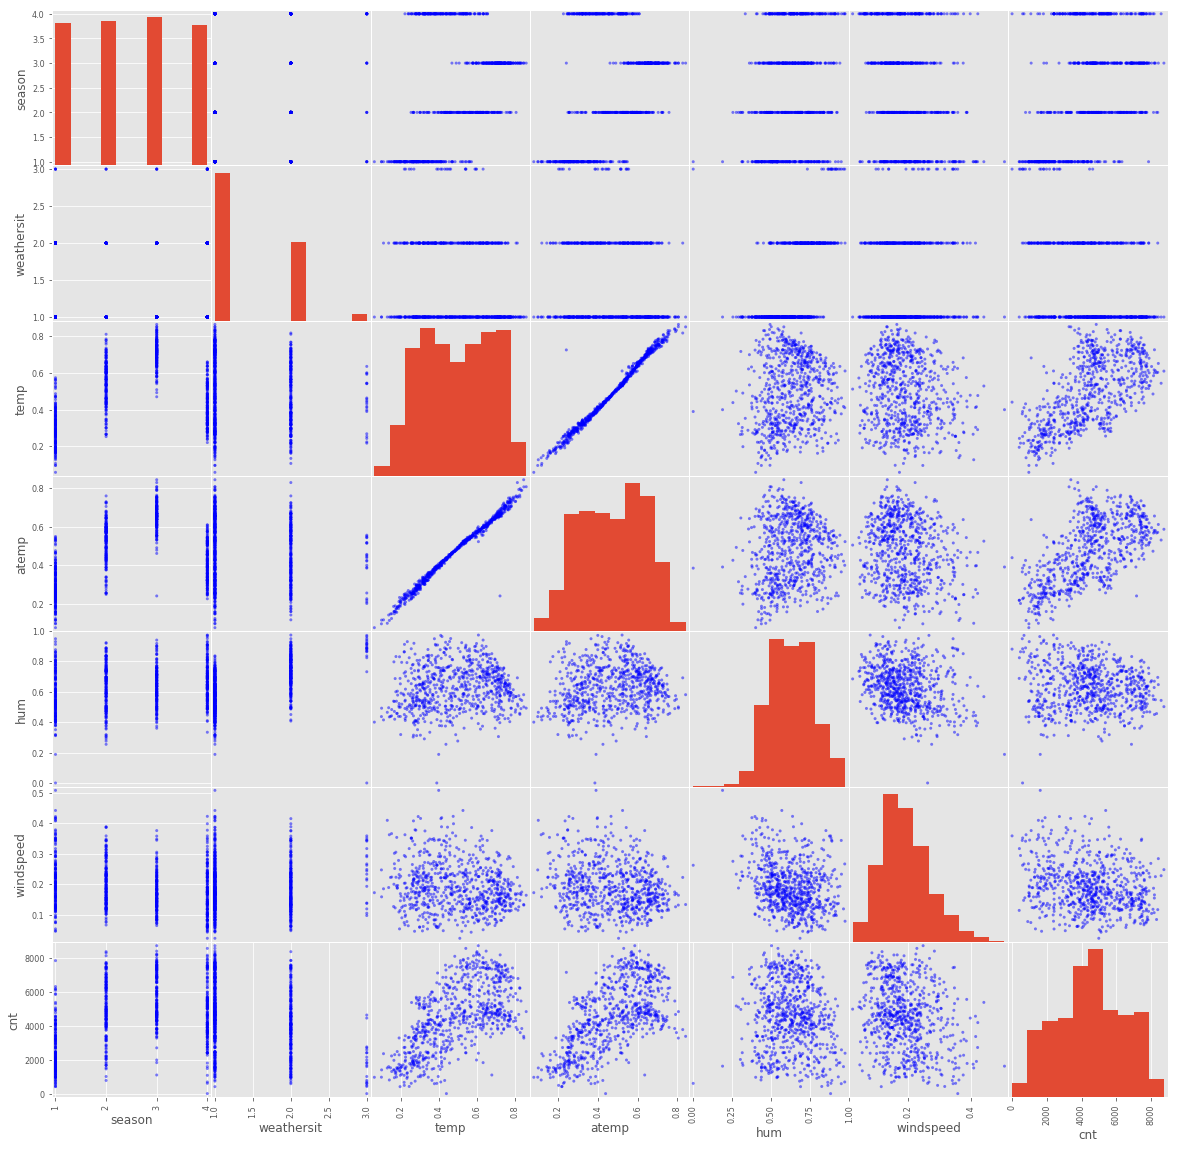

In [6]:
from pandas.plotting import scatter_matrix
scatter_matrix(df_day[['season','weathersit','temp','atemp','hum','windspeed','cnt']],figsize=(20, 20),color='b')

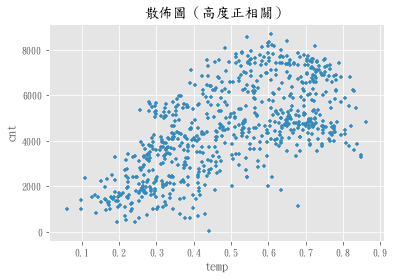

In [7]:
plt.rcParams['axes.unicode_minus']=False #正常顯示負號
plt.rcParams['font.family']='DFKai-SB'             #顯示中文
df_day.plot(kind='scatter',title='散佈圖（高度正相關）',figsize=(6,4),x='temp',y='cnt',marker='+')

# 三、線性回歸

## 3.1簡單線性回歸(1 feature)

### 3.1.1季節(season)和租賃自行車數量(cnt)

各變項參數: 
 [[ 698.79626757]]
均方誤差 (Mean squared error, MSE): 3285480.01


C:\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1297: UserWarning: findfont: Font family ['Microsoft JhengHei'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


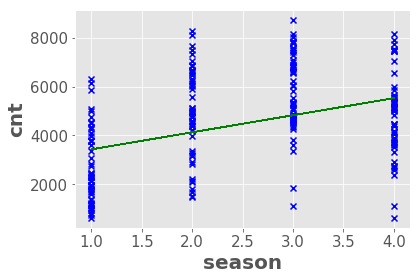

In [16]:
from sklearn.model_selection import train_test_split
from matplotlib.font_manager import FontProperties
font_title = FontProperties(size=20, weight='extra bold')

X = df_day[['season']]
y = df_day[['cnt']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3) # 30% for testing, 70% for training


# 畫出回歸線
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model

# linear regression 物件
regr = linear_model.LinearRegression()
# 訓練模型
regr.fit(X_train, y_train)

print('各變項參數: \n', regr.coef_)
print("均方誤差 (Mean squared error, MSE): %.2f" % np.mean((regr.predict(X_test) - y_test) ** 2))

plt.style.use('ggplot')
plt.scatter(X_test, y_test,  color='blue', marker = 'x')
plt.plot(X_test, regr.predict(X_test), color='green', linewidth=1)
plt.tick_params(labelsize=15)

plt.ylabel('cnt',FontProperties=font_title)
plt.xlabel('season',FontProperties=font_title)
plt.show()

### 3.1.2天氣(weathersit)和租賃自行車數量(cnt)

各變項參數: 
 [[-1098.03670794]]
均方誤差 (Mean squared error, MSE): 3130371.10


C:\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1297: UserWarning: findfont: Font family ['Microsoft JhengHei'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


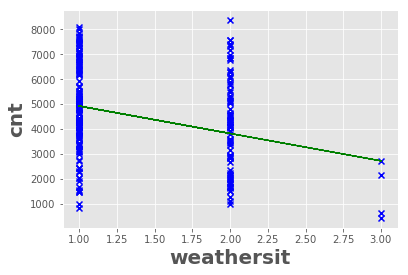

In [17]:
X = df_day[['weathersit']]
y = df_day[['cnt']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3) # 30% for testing, 70% for training

# linear regression 物件
regr = linear_model.LinearRegression()
# 訓練模型
regr.fit(X_train, y_train)

print('各變項參數: \n', regr.coef_)
print("均方誤差 (Mean squared error, MSE): %.2f" % np.mean((regr.predict(X_test) - y_test) ** 2))

plt.style.use('ggplot')
plt.scatter(X_test, y_test,  color='blue', marker = 'x')
plt.plot(X_test, regr.predict(X_test), color='green', linewidth=1)
plt.ylabel('cnt',FontProperties=font_title)
plt.xlabel('weathersit',FontProperties=font_title)
plt.show()

### 3.1.3溫度(temp)和租賃自行車數量(cnt)

各變項參數: 
 [[ 6473.4835322]]
均方誤差 (Mean squared error, MSE): 2423624.48


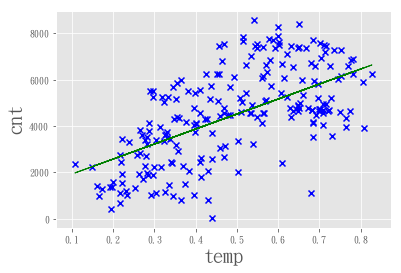

In [10]:
X = df_day[['temp']]
y = df_day[['cnt']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3) # 30% for testing, 70% for training

# linear regression 物件
regr = linear_model.LinearRegression()
# 訓練模型
regr.fit(X_train, y_train)

print('各變項參數: \n', regr.coef_)
print("均方誤差 (Mean squared error, MSE): %.2f" % np.mean((regr.predict(X_test) - y_test) ** 2))

plt.style.use('ggplot')
plt.scatter(X_test, y_test,  color='blue', marker = 'x')
plt.plot(X_test, regr.predict(X_test), color='green', linewidth=1)
plt.ylabel('cnt',FontProperties=font_title)
plt.xlabel('temp',FontProperties=font_title)
plt.show()

### 3.1.4體感溫度(atemp)和租賃自行車數量(cnt)

各變項參數: 
 [[ 7696.87648098]]
均方誤差 (Mean squared error, MSE): 2369904.88


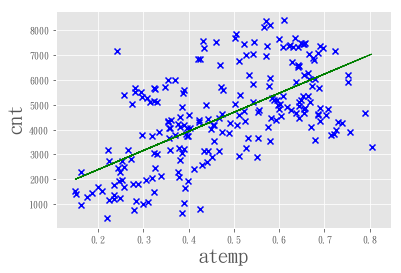

In [11]:
X = df_day[['atemp']]
y = df_day[['cnt']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3) # 30% for testing, 70% for training

# linear regression 物件
regr = linear_model.LinearRegression()
# 訓練模型
regr.fit(X_train, y_train)

print('各變項參數: \n', regr.coef_)
print("均方誤差 (Mean squared error, MSE): %.2f" % np.mean((regr.predict(X_test) - y_test) ** 2))

plt.style.use('ggplot')
plt.scatter(X_test, y_test,  color='blue', marker = 'x')
plt.plot(X_test, regr.predict(X_test), color='green', linewidth=1)
plt.ylabel('cnt',FontProperties=font_title)
plt.xlabel('atemp',FontProperties=font_title)
plt.show()

### 3.1.5濕度(hum)和租賃自行車數量(cnt)

各變項參數: 
 [[-1193.59725271]]
均方誤差 (Mean squared error, MSE): 3963896.78


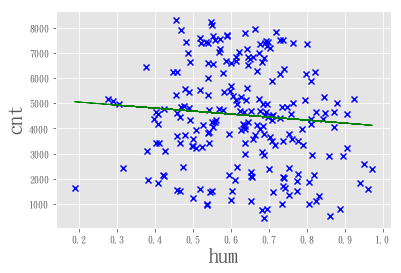

In [12]:
X = df_day[['hum']]
y = df_day[['cnt']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3) # 30% for testing, 70% for training

# linear regression 物件
regr = linear_model.LinearRegression()
# 訓練模型
regr.fit(X_train, y_train)

print('各變項參數: \n', regr.coef_)
print("均方誤差 (Mean squared error, MSE): %.2f" % np.mean((regr.predict(X_test) - y_test) ** 2))

plt.style.use('ggplot')
plt.scatter(X_test, y_test,  color='blue', marker = 'x')
plt.plot(X_test, regr.predict(X_test), color='green', linewidth=1)
plt.ylabel('cnt',FontProperties=font_title)
plt.xlabel('hum',FontProperties=font_title)
plt.show()

### 3.1.6風速(windspeed)和租賃自行車數量(cnt)

各變項參數: 
 [[-6145.70909937]]
均方誤差 (Mean squared error, MSE): 3664409.89


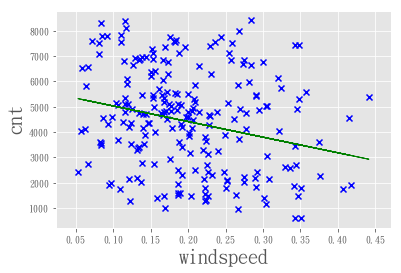

In [13]:
X = df_day[['windspeed']]
y = df_day[['cnt']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3) # 30% for testing, 70% for training

# linear regression 物件
regr = linear_model.LinearRegression()
# 訓練模型
regr.fit(X_train, y_train)

print('各變項參數: \n', regr.coef_)
print("均方誤差 (Mean squared error, MSE): %.2f" % np.mean((regr.predict(X_test) - y_test) ** 2))

plt.style.use('ggplot')
plt.scatter(X_test, y_test,  color='blue', marker = 'x')
plt.plot(X_test, regr.predict(X_test), color='green', linewidth=1)
plt.ylabel('cnt',FontProperties=font_title)
plt.xlabel('windspeed',FontProperties=font_title)
plt.show()

# plot_learning_curve function

In [12]:
# Scikit-Learn 官網作圖函式
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure(figsize=(10,6))  #調整作圖大小
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples",FontProperties=font_title)
    plt.ylabel("Score",FontProperties=font_title)
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

Automatically created module for IPython interactive environment


## 3.2 多變項線性回歸

In [15]:
from sklearn.model_selection import train_test_split

# 切割訓練和測試資料
X = df_day[['season','weathersit','temp','atemp','hum','windspeed']]
y = df_day[['cnt']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3) # 30% for testing, 70% for training

### 標準化(Normorlize)
降低模型複雜度，防止overfitting                                                                                               
降低權重過高情況

In [16]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
X_std = sc.transform(X)

### 創造高維變項

In [17]:
from sklearn.preprocessing import PolynomialFeatures

quadratic = PolynomialFeatures(degree=2)        #0~2次方
X_train_poly = quadratic.fit_transform(X_train_std)     #產生x^0, x^1, x^2
X_test_poly = quadratic.fit_transform(X_test_std)       #產生x^0, x^1, x^2
X_poly = quadratic.fit_transform(X_std)

## 多變項線性回歸(6 features)

In [18]:
import numpy as np
from sklearn.linear_model import LinearRegression
plt.style.use('ggplot')

lr = LinearRegression()
lr.fit(X_train_std, y_train)

print('各變項參數:', lr.coef_)
print("MSE: %.2f" % np.mean((lr.predict(X_test_std) - y_test) ** 2))
print("R Square:",lr.score(X_test_std, y_test))

各變項參數: [[ 439.73148039 -153.50170323  580.45359705  541.70031042 -485.91278836
  -212.12543607]]
MSE: 2043758.47
R Square: 0.444442649822


<module 'matplotlib.pyplot' from 'C:\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

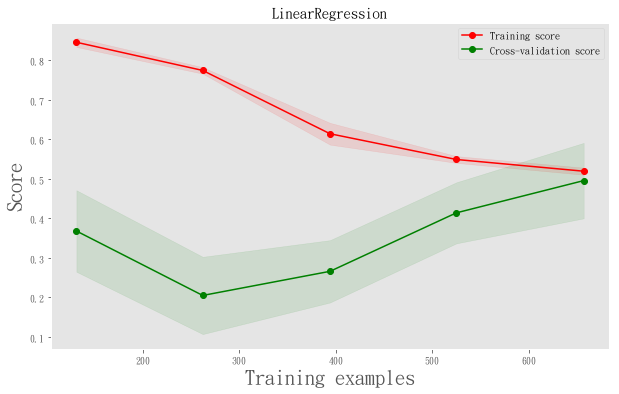

In [19]:
from sklearn.model_selection import KFold

cv = KFold(n_splits=10, random_state=None, shuffle=True)
estimator = LinearRegression()

plot_learning_curve(estimator, "LinearRegression", X_std, y, cv=cv, train_sizes=np.linspace(0.2, 1.0, 5))

# 3.3 多項式(Polynomial)非線性回歸

In [20]:
lr = LinearRegression()
lr.fit(X_train_poly, y_train)

print('各變項參數:', lr.coef_)
print("MSE: %.2f" % np.mean((lr.predict(X_test_poly) - y_test) ** 2))
print("R Square:",lr.score(X_test_poly, y_test))

各變項參數: [[  3.23110565e-13   3.72370932e+02  -7.55079378e+01   2.89387080e+03
   -1.78118125e+03  -6.02596653e+02  -3.56358000e+02  -8.14694358e+01
   -2.06714900e+00  -1.65020917e+03   1.73851014e+03  -9.61777848e+01
    4.16658923e+01   2.87031344e+01  -7.00183227e+02   6.56563657e+02
   -2.24520808e+02  -1.43036292e+02  -1.29520032e+03   2.98349400e+02
    7.42007445e+02  -5.60365338e+02   2.45548090e+02  -7.96277537e+02
    6.30205664e+02  -1.62490037e+01  -5.33632502e+01   9.67079294e+00]]
MSE: 1889720.04
R Square: 0.486315104639


<module 'matplotlib.pyplot' from 'C:\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

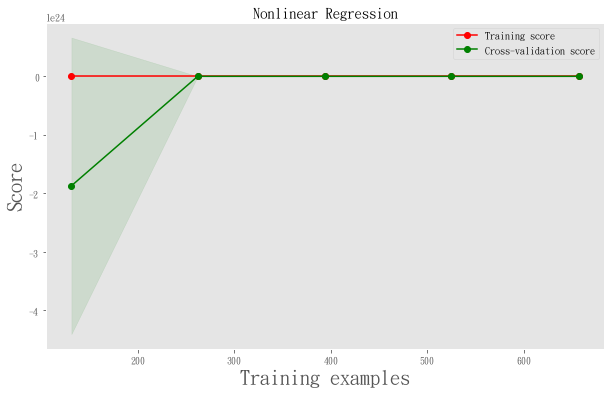

In [21]:
from sklearn.model_selection import KFold

cv = KFold(n_splits=10, random_state=None, shuffle=True)
estimator = LinearRegression()

plot_learning_curve(estimator, "Nonlinear Regression", X_poly, y, cv=cv, train_sizes=np.linspace(0.2, 1.0, 5))

## 將回歸寫成function

In [13]:
# 多變項迴歸
def Muti_variable_std_regression(X, y,tag='std', flag='multi'):

    import numpy as np
    from sklearn.model_selection import train_test_split

    from sklearn.preprocessing import StandardScaler
    from sklearn.preprocessing import PolynomialFeatures

    from sklearn.linear_model import LinearRegression
    from sklearn.linear_model import Ridge
    from sklearn.linear_model import Lasso

    from sklearn.model_selection import KFold
    

    # 切割訓練和測試資料
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3) # 30% for testing, 70% for training
    
     # 標準化
    sc = StandardScaler()
    sc.fit(X_train)
    X_train = sc.transform(X_train)
    X_test = sc.transform(X_test)
    X = sc.transform(X)
        
    # 創造高維變項
    if tag == 'poly':
        quadratic = PolynomialFeatures(degree=2)        #0~2次方
        X_train = quadratic.fit_transform(X_train)     #產生x^0, x^1, x^2
        X_test = quadratic.fit_transform(X_test)       #產生x^0, x^1, x^2
        X = quadratic.fit_transform(X) 
    
    
    # 多變項迴歸 
    if flag == 'multi':
        lr = LinearRegression()
        lr.fit(X_train, y_train)
        print('各變項參數:', lr.coef_)
        print("MSE: %.2f" % np.mean((lr.predict(X_test) - y_test) ** 2))
        print("R Square:",lr.score(X_test, y_test))
        
        cv = KFold(n_splits=10, random_state=None, shuffle=True)
        estimator = LinearRegression()
        if tag == 'std':
            plot_learning_curve(estimator, "LinearRegression", X, y, cv=cv, train_sizes=np.linspace(0.2, 1.0, 5))
        elif tag =='poly':
            plot_learning_curve(estimator, "NonlinearRegression", X, y, cv=cv, train_sizes=np.linspace(0.2, 1.0, 5))

    # 脊迴歸(Ridge Regression):L2 正規化
    elif flag == 'ridge':
        ridge = Ridge(alpha=1)
        ridge.fit(X_train, y_train)

        print('各變項參數:', ridge.coef_)
        print("MSE: %.2f" % np.mean((ridge.predict(X_test) - y_test) ** 2))
        print("R Square:",ridge.score(X_test, y_test))
        
        cv = KFold(n_splits=10, random_state=None, shuffle=True)
        estimator = Ridge(alpha=1)
        plot_learning_curve(estimator, "Ridge Regression", X, y, cv=cv, train_sizes=np.linspace(0.2, 1.0, 5))
    
    #  LASSO：L1正規化 
    elif flag == 'lasso':
        lasso = Lasso(alpha=1)
        lasso.fit(X_train, y_train)

        print('各變項參數:', lasso.coef_)
        print("MSE: %.2f" % np.mean((lasso.predict(X_test) - y_test.values.ravel()) ** 2)) #.values.ravel()把矩陣轉成一維
        print("R Square:",lasso.score(X_test, y_test))
        
        cv = KFold(n_splits=10, random_state=None, shuffle=True)
        estimator = Lasso(alpha=1)
        plot_learning_curve(estimator, "Lasso", X, y, cv=cv, train_sizes=np.linspace(0.2, 1.0, 5))

#### 多變項

各變項參數: [[ 418.9773744  -301.21938408  523.06791034  472.92741831 -277.16426308
  -293.57803293]]
MSE: 1585042.00
R Square: 0.555883120455


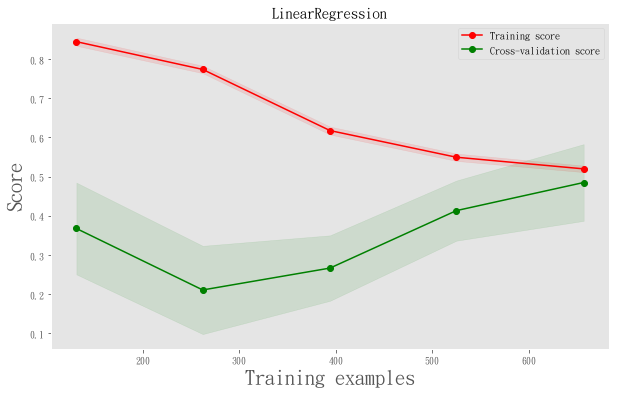

In [23]:
Muti_variable_std_regression(X, y,tag='std', flag='multi')

#### 高次方

各變項參數: [[  4.09191479e+16   1.37320225e+02  -2.82440241e+01   6.88360404e+03
   -5.62480557e+03  -3.53243537e+02  -5.42968650e+02   3.76520433e+02
   -2.38884675e+01  -3.41961821e+03   3.38490166e+03  -1.10423171e+02
    2.02249419e+02  -2.00336542e+02  -1.94658723e+02   3.38814765e+02
   -7.69336234e+01  -2.06312194e+02  -1.12484947e+04   1.51626339e+04
    1.02902249e+02  -2.68536699e+03  -4.72727218e+03  -3.71961309e+02
    2.94873043e+03  -6.91447519e+01   3.76144106e+01   1.11582810e+02]]
MSE: 11640920.92
R Square: -2.11876612788


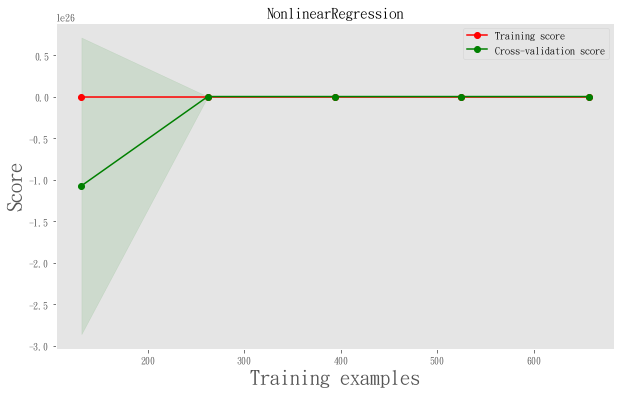

In [24]:
Muti_variable_std_regression(X, y,tag='poly', flag='multi')

## 3.4 脊回歸(Ridge Regression): L2 正規化

#### 多變項

各變項參數: [[ 410.01953838 -251.68934118  466.50475051  551.69158939 -322.95971948
  -186.69675355]]
MSE: 1705211.39
R Square: 0.586210714667


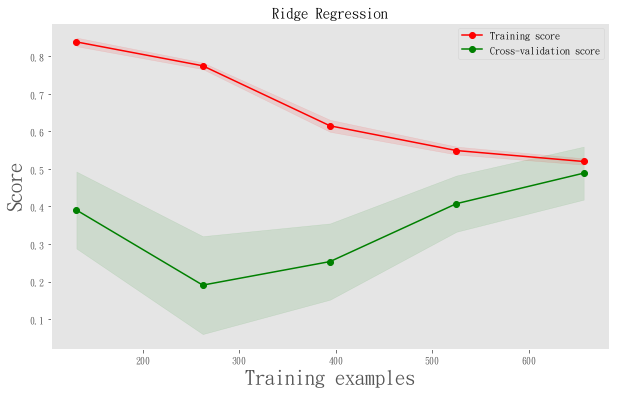

In [25]:
Muti_variable_std_regression(X, y,tag='std', flag='ridge')

#### 高次方

各變項參數: [[   0.          376.30785285  -48.88947909  794.83553909   83.54645528
  -491.6327684  -334.8708221   -97.91556808   30.52251853 -903.22262839
   983.54781678 -158.58591975  101.56526596  -90.54584026  -26.60902197
  -104.00599734   -7.58043168 -133.29323464 -365.83671436 -495.29365449
  -171.77096909  353.39625943  124.82723109  263.03026198 -527.92961548
  -158.42608977  -40.87718496  -88.76885948]]
MSE: 1475593.60
R Square: 0.620996593583


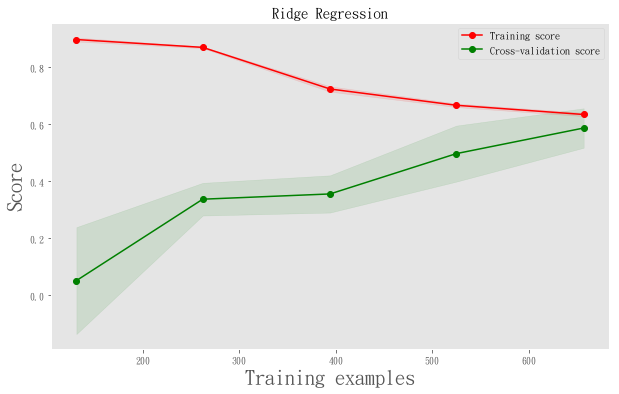

In [26]:
Muti_variable_std_regression(X, y,tag='poly', flag='ridge')

## 3.5 LASSO：L1正規化

#### 多變項

各變項參數: [ 433.7925166  -292.69528741  723.83368158  314.33525739 -329.57552229
 -284.65776996]
MSE: 1967319.40
R Square: 0.487744141822


C:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with v

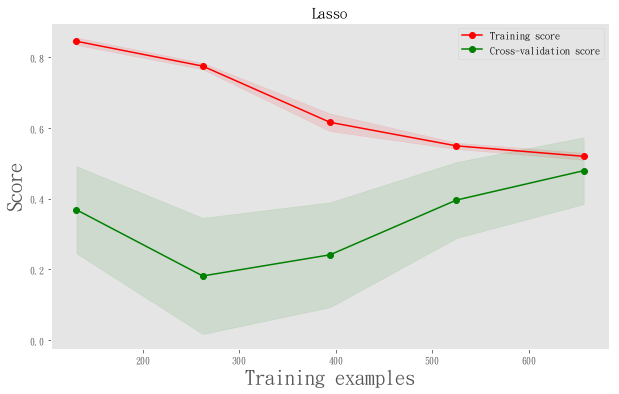

In [27]:
Muti_variable_std_regression(X, y,tag='std', flag='lasso')

#### 高次方

C:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with v

各變項參數: [    0.           345.3147312    -28.29916658  1414.77436849  -448.97683044
  -565.29779815  -351.72385835   -99.95495053    63.87504364 -1826.0810973
  1863.8478495   -177.94778848    54.39221064   -85.02012918    -0.
   -13.44516965    -0.          -205.12887204  -639.1830099     -0.
     9.09026144     0.          -107.67003873    -0.           -63.39571131
  -179.35513778     0.           -57.41241972]
MSE: 1627996.33
R Square: 0.558242000786


C:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with v

C:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with v

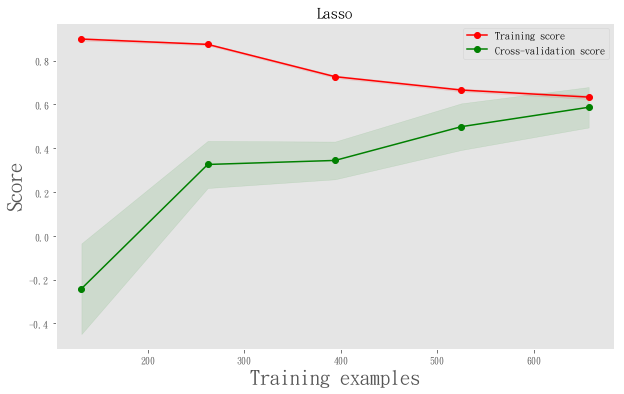

In [28]:
Muti_variable_std_regression(X, y,tag='poly', flag='lasso')

# 相關性大於0.6的做訓練

In [44]:
X = df_day[['temp','atemp','casual','registered']]
y = df_day[['cnt']]

各變項參數: [[ -1.41555788e-12   5.68434189e-13   7.00327162e+02   1.56210842e+03]]
MSE: 0.00
R Square: 1.0


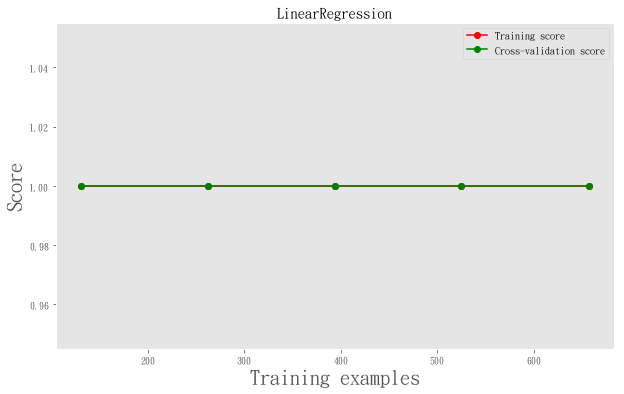

In [45]:
Muti_variable_std_regression(X, y,tag='std', flag='multi')

各變項參數: [[  0.00000000e+00  -5.43254330e-12   3.41060513e-12   6.82009895e+02
    1.51993459e+03   3.15480975e-12  -5.11590770e-12   3.63797881e-12
   -4.43378667e-12   2.27373675e-12  -2.92743607e-12   3.65218966e-12
   -8.52651283e-14  -1.70530257e-13  -1.13686838e-13]]
MSE: 0.00
R Square: 1.0


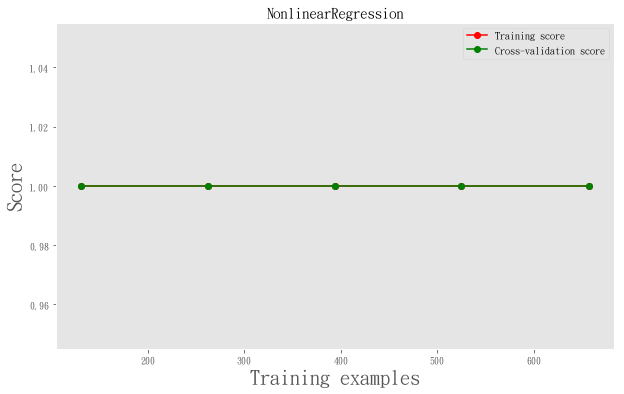

In [47]:
Muti_variable_std_regression(X, y,tag='poly', flag='multi')

各變項參數: [[  0.00000000e+00   6.67394314e+02   1.53650122e+03   9.57498519e-01
   -2.13172556e+00   8.22058490e-01]]
MSE: 13.01
R Square: 0.999996806641


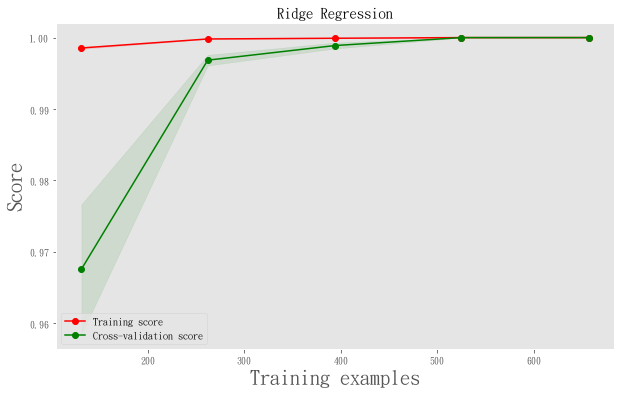

In [53]:
Muti_variable_std_regression(X, y,tag='poly', flag='ridge')

各變項參數: [    0.           666.99824948  1550.2021047      0.            -0.            -0.        ]
MSE: 1.64
R Square: 0.999999588136


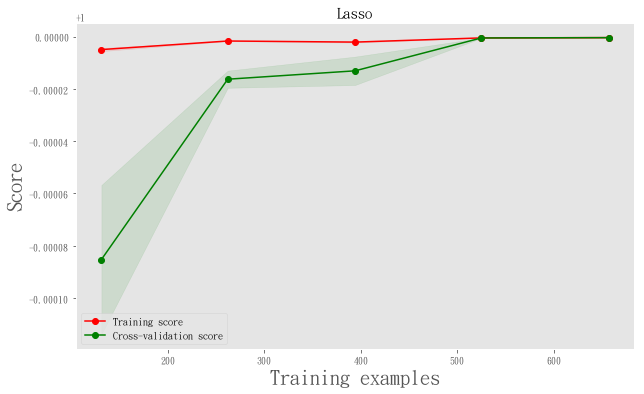

In [54]:
Muti_variable_std_regression(X, y,tag='poly', flag='lasso')

## 全部特徵去學習

In [24]:
X = df_day[['season','yr','mnth','holiday','weekday','workingday',
             'weathersit','temp','atemp','hum','windspeed','casual','registered']]
y = df_day[['cnt']]

各變項參數: [[ -2.44633056e-13  -1.02318154e-12   9.09494702e-13   6.82121026e-13
    4.54747351e-13  -4.54747351e-13  -1.70530257e-13  -7.95807864e-13
   -1.13686838e-13   3.97903932e-13   1.42108547e-14   6.94174005e+02
    1.54200186e+03]]
MSE: 0.00
R Square: 1.0


C:\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1297: UserWarning: findfont: Font family ['Microsoft JhengHei'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


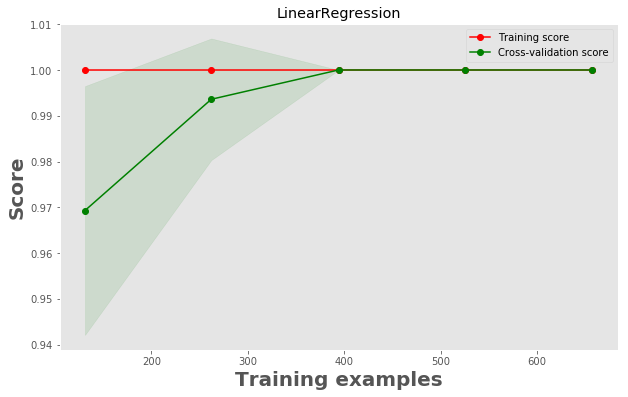

In [19]:
Muti_variable_std_regression(X, y,tag='std', flag='multi')

各變項參數: [[  7.72591596e-11   1.93267624e-12   1.71784793e-01  -2.50111043e-12
    3.15204065e+00   1.16529009e-12  -1.17710673e+00  -2.00017780e-12
    1.36424205e-12  -3.97903932e-13   1.27897692e-13  -9.23705556e-13
    6.48422078e+02   1.55815664e+03   1.77635684e-12   1.53832502e-12
   -4.97379915e-13   8.73967565e-13   7.95807864e-13   7.99360578e-13
   -9.23705556e-13  -2.91322522e-12   2.38742359e-12   3.55271368e-13
    1.63424829e-13   5.89750471e-13  -1.49213975e-12   3.98916765e+00
   -3.83693077e-13   4.76063633e-13   5.40012479e-13   4.12114787e-13
   -5.75539616e-13   1.83320026e-12  -9.23705556e-13   3.62376795e-13
    1.70530257e-13  -2.84217094e-14  -1.49391610e-12  -7.10542736e-13
   -5.04485342e-13  -1.95399252e-13  -9.52127266e-13   1.03383968e-12
    2.16715534e-12  -2.68585154e-12   7.10542736e-15  -1.63424829e-13
   -1.11555210e-12   1.28608235e-12  -5.20965990e-01   3.58824082e-13
    7.77741123e-03   2.66453526e-13   1.81490378e-11  -1.85202964e-11
    5.1869619

C:\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1297: UserWarning: findfont: Font family ['Microsoft JhengHei'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


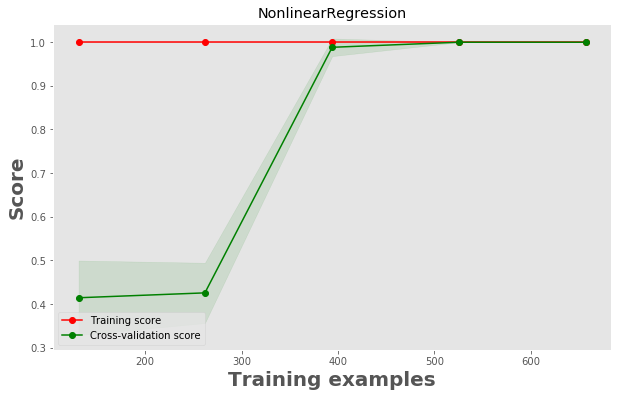

In [25]:
Muti_variable_std_regression(X, y,tag='poly', flag='multi')

各變項參數: [[  0.00000000e+00   1.21597241e+01   3.18232552e+01   4.21130460e+00
   -7.49698602e-03   4.48617597e+00   6.93382247e+00  -4.66567183e+00
    3.15186044e+01  -8.45964179e+00  -7.56001208e+00  -7.24990389e+00
    6.79180085e+02   1.52540110e+03  -3.95440381e+00  -8.39461243e+00
   -4.81974917e-01   1.26989454e+01  -2.55083426e+00  -8.54866514e+00
    7.88363679e-01  -1.45994663e+01   1.92661726e+00  -1.82962636e+00
   -1.32494121e+00  -3.92774116e+00   1.45098278e+01  -2.11857129e+00
   -2.08383538e+00   6.63153534e+00  -2.52050825e+00  -4.56881054e+00
   -2.94354406e+00  -1.00764791e+01  -4.04385737e+00  -1.04653117e-01
    6.38556657e-01  -5.86621183e-01   2.84373314e+01  -4.63082090e+00
   -8.66732547e+00   1.39616540e+00   6.21563929e+00  -1.12985013e+00
   -9.80872243e+00   1.44369326e+01   1.79648379e+00   1.37983470e+00
    2.70866160e+00   1.88594690e+00  -4.34101829e-02   8.38724600e+00
   -1.15248950e+00   1.03250146e+00  -6.55085442e+00   9.07725657e+00
    3.2888704

C:\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1297: UserWarning: findfont: Font family ['Microsoft JhengHei'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


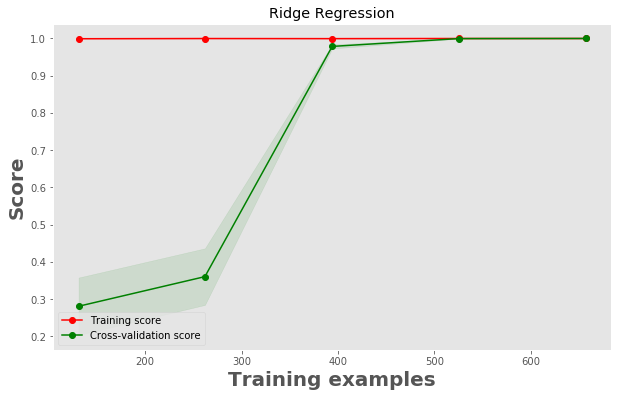

In [26]:
Muti_variable_std_regression(X, y,tag='poly', flag='ridge')

## casual和registered去學習

In [48]:
X = df_day[['casual','registered']]
y = df_day[['cnt']]

各變項參數: [[  0.00000000e+00   6.98223345e+02   1.51785023e+03   0.00000000e+00
   -1.08002496e-12   7.53175300e-13]]
MSE: 0.00
R Square: 1.0


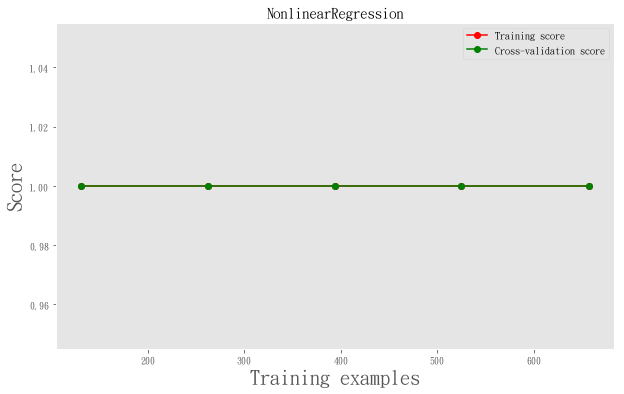

In [52]:
# Nonlinear regression
Muti_variable_std_regression(X, y,tag='poly', flag='multi')

各變項參數: [  681.44795722  1566.20933781]
MSE: 1.37
R Square: 0.999999619095


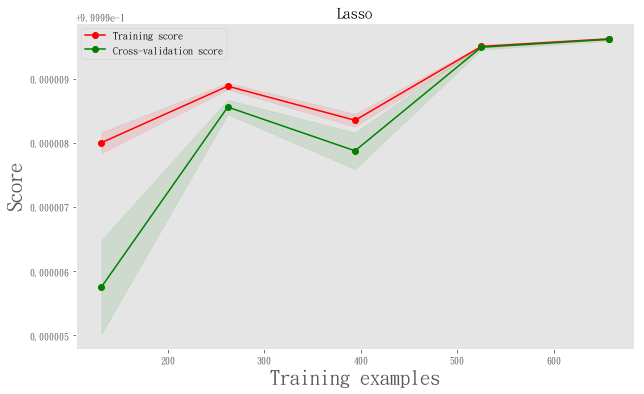

In [50]:
# Lasso std
Muti_variable_std_regression(X, y,tag='std', flag='lasso')